# TD Méthodes d'apprentissage

Merci de renseigner votre groupe:

* Loïc LEVEQUE
* Clément CRISPEL
* Amaury ARCHAMBAUD

# Prédiction d'AVC

Vous trouverez dans cette archive un jeu de données (`healthcare-dataset-stroke-data.csv` -
[source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)) portant sur des patients suspecté
d'avoir eu un AVC.

Les colonnes suivantes sont renseignées:

* `gender`: le genre (`Male`, `Female` ou `Other`) du patient,
* `age`: l'age du patient,
* `hypertension`: 0 si le patient n'a pas d'hypertension, 1 sinon,
* `hear_disease`: 0 si le patient n'a jamais eu de maladie cardiaque, 1 sinon,
* `ever_married`: `No` ou `Yes` si le patient a déjà été marié,
* `work_type`: l'emploi du patient (`children`, `Govt_job`, `Never_worked`, `Private` or `Self-employed`),
* `Residence_type`: `rural` ou `urbain`,
* `avg_glucose_level`: le niveau de glucose dans le sang,
* `bmi`: l'IMC (*body mass index*),
* `smoking_status`: selon si le patient fume: `formerly smoked`, `never smoked` `smokes` or `Unknown`,
* `stroke`: 1 si le patient a un AVC, 0 sinon (la variable que l'on souhaite prédire).

## 1. Chargement des données

### 1.1 Chargez les données:

In [182]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### 1.2 Le nombre de lignes qu'elles contiennent:

In [173]:
taille = len(df)
print("Nombre de lignes : ", taille)

Nombre de lignes :  5110


### 1.3 Le % de personnes qui ont eu un AVC

In [174]:
avc = df[df['stroke'] == 1]
print(round(len(avc)/taille*100,2), "% des personnes ont eu un AVC")

4.87 % des personnes ont eu un AVC


### 1.4 Le % d'hommes et le % de femmes qui ont eu un AVC

In [175]:
nB_hommes_avc = len(avc[avc["gender"] == 'Male'])
nb_femmes_avc = len(avc[avc["gender"] == 'Female'])
print(round(nB_hommes_avc/len(avc)*100,2), "% des personnes ayant eu un AVC sont des hommes")
print(round(nb_femmes_avc/len(avc)*100,2), "% des personnes ayant eu un AVC sont des femmes")

43.37 % des personnes ayant eu un AVC sont des hommes
56.63 % des personnes ayant eu un AVC sont des femmes


### 1.5 Un histogramme des ages, pour les personnes ayant eu un AVC et celles n'ayant pas eu d'AVC:

TypeError: 'str' object is not callable

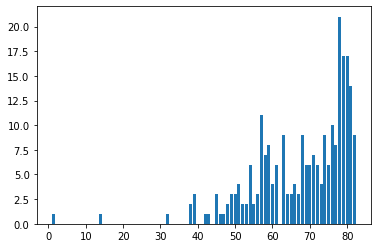

In [176]:
import matplotlib.pyplot as plt
age = df.loc[df["stroke"] == 1].groupby(by='age')['stroke'].sum()
plt.bar(age.index, age.values)
plt.title("Nombre de personnes ayant eu un AVC par age")
plt.show()

age = df[df["stroke"] == 0].groupby(by='age')["stroke"].count()
plt.bar(age.index, age.values)
plt.title="Nombre de personnes n'ayant pas eu d'AVC par age"
plt.show()


## 2. Moindres carrés

### 2.1 `age` vs `bmi`

Tracez le graphique (en nuage de points) ayant en abscisse l'age et en ordonnées l'indice de masse corporel (`bmi`):

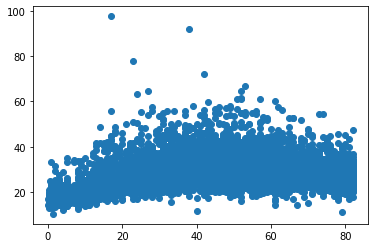

In [ ]:
cache = df.dropna()
ages = cache["age"] 
bmi = cache["bmi"]
plt.plot(df["age"], df["bmi"], 'o')
plt.show()

### 2.2 Modèle linéaire

À partir de la courbe ci-dessus, trouvez les paramètres $f(x) = ax + b$ optimums au sens des moindres carrés

In [ ]:
import numpy as np

sum_x = np.sum(ages)
sum_y = np.sum(bmi) 
sum_xy = np.sum(ages * bmi)
sum_x2 = np.sum(ages**2)

w1 = (sum_xy - (1/len(ages)) * sum_x * sum_y) / (sum_x2 - (1/len(ages)) * sum_x**2)
w2 = (sum_y - w1 * sum_x)/len(ages)



print("a = ", w1)
print("b = ", w2)

a =  0.11609473538787873
b =  23.91679268280749


Tracez à nouveau le nuage de point, en superposant la courbe trouvée

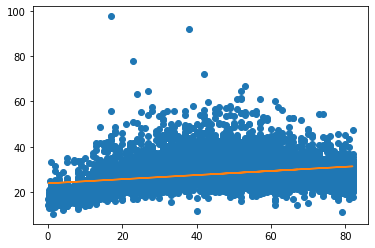

In [ ]:
plt.plot(ages,bmi,'o')
plt.plot(ages,w1*ages+w2)
plt.show()

Que pensez vous du résultat ?

Il est bien

### 2.3 Modèle quadratique

Faites la même chose, mais pour le modèle $f(x) = ax^2 + bx + c$

a=-0.005557771740837978, b=0.577646642918175 , c=17.171118344898257


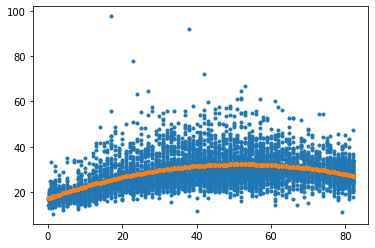

L'age a partir du quel l'IMC commence a diminué est :  52


In [ ]:
A = np.array([
    [xi**2, xi ,1] 
    for xi in ages
])
b = bmi
w1, w2 , w3 = np.linalg.pinv(A) @ b
print(f"a={w1}, b={w2} , c={w3}")

y = w1*ages**2+w2*ages+w3

plt.plot(ages,bmi,'.')
plt.plot(ages,y,".")
plt.show()

max_age = 0
d = 2*w1*max_age + w2
while(d > 0):
    max_age += 1
    d = 2*w1*max_age + w2

print("L'age a partir du quel l'IMC commence a diminué est : ", max_age)


*Vous devriez constater trois "phases": l'IMC monte (avec la croissance), puis stagne, et enfin baisse.*

**À partir de votre modèle, déterminez à quel age l'IMC cesse de monter et commence à baisser.**



Par observation on peut constater que l'IMC inverse sa tendance et commence à baisser aux alentours des 50 ans.
On obtient par le calcul l'age exact qui est de 52 ans

## 3. Prédiction des AVC



### 3.1 Préparation des données

Nous allons préparer les données, notamment:

* Enlever la colonne  `id`, qui ne nous servira pas à l'entraînement,
* À l'aide de la méthode [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), les colonnes prenant des valeurs discrètes seront remplacées par leur représentation [one hot](https://en.wikipedia.org/wiki/One-hot)
  * *Par exemple, au lieu de la colonne `gender` qui pourra valoir `Male` ou `Female`, on aura `gender_Male` et `gender_Female` qui pourront valoir 0 ou 1.*

In [183]:
df = pd.get_dummies(df)
df = df.dropna()
df = df.drop(columns=["id"])
stroke = df["stroke"]
df = df.drop(columns=["stroke"])
df['age'] =( df['age'] - df['age'].mean() ) / df['age'].std()
df['bmi'] =( df["bmi"] - df["bmi"].mean() ) / df["bmi"].std()
df["avg_glucose_level"] =( df['avg_glucose_level'] - df['avg_glucose_level'].mean() ) / df['avg_glucose_level'].std()




print(df)

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.070029             0              1           2.777415  0.981245   
2     1.646395             0              1           0.013840  0.459222   
3     0.271984             0              0           1.483980  0.701135   
4     1.602059             1              0           1.549035 -0.623020   
5     1.690731             0              0           1.821183  0.013593   
...        ...           ...            ...                ...       ...   
5104 -1.324106             0              0          -0.050089 -1.310561   
5106  1.690731             0              0           0.447837  1.414142   
5107 -0.348718             0              0          -0.502318  0.217309   
5108  0.360655             0              0           1.372780 -0.419303   
5109  0.050305             0              0          -0.450770 -0.342910   

      gender_Female  gender_Male  gender_Other  ever_married_No  \
0                 0 

### 3.1 Séparation des données d'entraînement / test

Maintenant, nous allons séparer ces données en:

* Un jeu d'entraînement (90%),
* Un jeu de test (10%).

[indication](https://stackoverflow.com/a/35531218/3776931)

In [184]:
trainX=df.sample(frac=0.9,random_state=200)
trainY=stroke[trainX.index]
testX=df.drop(train.index)
testY=stroke[testX.index]

print("Nombre de lignes dans le train : ", len(train))
print("Nombre de lignes dans le test : ", len(test))


Nombre de lignes dans le train :  4418
Nombre de lignes dans le test :  491


### 3.3 Chargement de `torch`

On chargera `torch`, et on déclarera un perceptron multi-couche avec deux couches cachées:

In [185]:
import torch as th


class MLP(th.nn.Module):
    def __init__(self, input_dimension: int):
        super().__init__()

        layers = [
            th.nn.Linear(input_dimension, 128),
            th.nn.ReLU(),
            th.nn.Linear(128, 128),
            th.nn.ReLU(),
            th.nn.Linear(128, 1),
            th.nn.Sigmoid()
        ]

        self.net = th.nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


Notez que la sortie de ce réseau est une fonction d'activation (sigmoïde) qui produira une valeur entre 0 et 1.

Créez maintenant votre réseau en définissant son nombre d'entrées:

In [186]:
net = MLP(21)

### 3.4: Échantillonage des données

Écrivez une fonction qui sélectionne au hasard N lignes des données d'entraînement:



In [200]:
def sample_data(n=128):

    # TODO: extraire 128 lignes au hasard des données d'entraînement
    # - ages devrait être de taille n x nb_valeurs
    # - bmi devrait être de taille n
    
    x = trainX.sample(n=n)
    y = trainY[x.index]
    return x,y

sample_data()

AttributeError: 'numpy.ndarray' object has no attribute 'float'

Vous pourrez compléter le code suivant afin d'entraîner votre réseau. Vous utiliserez la perte [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html):

In [199]:
# Création d'un optimiseur
optimizer = th.optim.Adam(net.parameters(), 1e-4)

# Pour 1024 étapes d'entraînement
for k in range(1024):
    # On échantillonne 128 données
    data = sample_data(128)
    
    # Fonction de perte
    loss = th.nn.BCELoss()
    input = th.tensor(data[0].values)
 
    output = loss(net(input),data[1])
    optimizer.zero_grad()
    output.backward()
    optimizer.step()
    print(output)

TypeError: cannot convert the series to <class 'float'>

### 3.5: Évaluation de votre réseau

En utilisant vos données de test, mesurez le % des données qui est bien étiquetée par le réseau

In [ ]:
# On calcule la perte



Calculez maintenant le % de données positives (stroke=1) et négatives (stroke=0) bien étiquetées

In [ ]:
# À faire

Calculez les nombres:
* **TP**: Vrais positifs
* **TN**: Vrais négatifs
* **FP**: Faux positifs
* **FN**: Faux négativs

In [ ]:
# À faire

### 4. Quelques métriques

On définit l'exactitude comme le % de données bien étiquetées (indépendament du fait qu'elles soient positives ou négatives).

Calculez l'exactitude de votre prédiction:

In [ ]:
# À faire

Réécrivez votre boucle d'entraînement afin de produire un graphique montrant, pour chaque étape de l'entraînement:

- La loss sur le jeu de test,
- La loss sur le jeu d'entraînement,
- L'exactitude sur le jeu de test,
- L'exactitude sur le jeu d'entraînement.

In [ ]:
# À faire